<a href="https://colab.research.google.com/github/ybii22/Machine-Learning/blob/main/UAS/Classification_Models_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install gdown pandas

import pandas as pd
import gdown

# Ubah URL ke format gdown
url = 'https://drive.google.com/uc?id=1wplbZ_1B4H46YvJ4MVqFiaILpvhQojBV'
output = 'data.csv'

gdown.download(url, output, quiet=False)

# Load file CSV
df = pd.read_csv('data.csv')

# Tampilkan beberapa baris awal
print(df.head())

# Cari kolom bertipe int (target berada di kolom pertama int)
target_column = df.select_dtypes(include='int64').columns[0]
print("Target kolom:", target_column)

# Cek jumlah missing values
print("Missing value per kolom:")
print(df.isnull().sum())

# Drop baris yang mengandung missing values
df_cleaned = df.dropna().reset_index(drop=True)

print("\nUkuran data setelah dibersihkan:", df_cleaned.shape)

# Pisahkan fitur dan target
X = df_cleaned.drop(columns=[target_column])
y = df_cleaned[target_column]

print("\nContoh fitur:")
print(X.head())

print("\nContoh target:")
print(y.head())


Downloading...
From (original): https://drive.google.com/uc?id=1wplbZ_1B4H46YvJ4MVqFiaILpvhQojBV
From (redirected): https://drive.google.com/uc?id=1wplbZ_1B4H46YvJ4MVqFiaILpvhQojBV&confirm=t&uuid=07fc9186-47f5-42fd-8726-eef573b6afdf
To: /content/data.csv
100%|██████████| 151M/151M [00:02<00:00, 65.0MB/s]


   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

## **Feature Engineering**

In [ ]:
# Kolom kategorikal: bertipe object
categorical_cols = X.select_dtypes(include='object').columns.tolist()

# Kolom numerik: bertipe int atau float
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Kolom kategorikal:", categorical_cols)
print("Kolom numerik:", numeric_cols)

# One-hot encoding dengan drop_first untuk menghindari dummy trap
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

print("Ukuran data setelah encoding:", X_encoded.shape)

from sklearn.preprocessing import StandardScaler

# Buat objek scaler
scaler = StandardScaler()

# Normalisasi hanya pada fitur hasil encoding (semua fitur setelah one-hot akan jadi numerik)
X_scaled = scaler.fit_transform(X_encoded)

print("Contoh data setelah normalisasi:")
print(X_scaled[:5])
from sklearn.model_selection import train_test_split

# Split data 80% train - 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print("Ukuran X_train:", X_train.shape)
print("Ukuran X_test:", X_test.shape)


Kolom kategorikal: []
Kolom numerik: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']
Ukuran data setelah encoding: (284807, 30)
Contoh data setelah normalisasi:
[[-1.99658302 -0.69424232 -0.04407492  1.6727735   0.97336551 -0.24511658
   0.34706795  0.19367894  0.08263728  0.33112778  0.08338555 -0.54040704
  -0.61829572 -0.99609892 -0.32461019  1.60401384 -0.53683287  0.24486345
   0.03076993  0.49628203  0.32611802 -0.02492336  0.38285444 -0.17691133
   0.11050692  0.24658544 -0.39217043  0.33089162 -0.06378115  0.24496426]
 [-1.99658302  0.60849633  0.16117592  0.1097971   0.31652293  0.04348335
  -0.06181997 -0.06370021  0.07125348 -0.23249419 -0.15334963  1.58000285
   1.06608857  0.4914182  -0.14998248  0.69436042  0.52943375 -0.13516997
  -0.21876258 -0.17908605 -0.08961086 -0.3073768  -0.88007675  0.16220118
  -0.56113055 

## **MLP**

### **TensorFlow**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks, optimizers

# Input shape
input_dim = X_train.shape[1]

# Model
model_tf = models.Sequential([
    layers.Dense(128, input_dim=input_dim),
    layers.BatchNormalization(),
    layers.ReLU(),
    layers.Dropout(0.3),

    layers.Dense(64),
    layers.BatchNormalization(),
    layers.ReLU(),
    layers.Dropout(0.3),

    layers.Dense(1)  # regresi -> output 1 nilai
])

# Optimizer dengan L2 regularization (weight decay)
optimizer = optimizers.Adam(learning_rate=0.001)

# Compile
model_tf.compile(optimizer=optimizer, loss='mse')

# Early stopping
early_stop = callbacks.EarlyStopping(patience=10, restore_best_weights=True)

# Learning rate scheduler
reduce_lr = callbacks.ReduceLROnPlateau(factor=0.5, patience=5, verbose=1)

# Training
history = model_tf.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=32,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 44s 6ms/step - loss: 0.0992 - val_loss: 0.0047 - learning_rate: 0.0010
Epoch 2/100
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 76s 5ms/step - loss: 8.9856e-04 - val_loss: 0.0396 - learning_rate: 0.0010
Epoch 3/100
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 31s 4ms/step - loss: 6.7251e-04 - val_loss: 0.0463 - learning_rate: 0.0010
Epoch 4/100
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 41s 4ms/step - loss: 5.9219e-04 - val_loss: 0.0086 - learning_rate: 0.0010
Epoch 5/100
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 31s 4ms/step - loss: 5.5239e-04 - val_loss: 0.0280 - learning_rate: 0.0010
Epoch 6/100
7120/7121 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.0305e-04
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 29s 4ms/step - loss: 6.0306e-04 - val_loss: 0.0118 - learning_rate: 0.0010
Epoch 7/100
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 31s 4ms/step - loss: 5.5328e-04 - val_loss: 0.0310 - learning_rate: 5.0000e-04
Epoch 8/100
7121/7121 ━━━━━━━━━━━━━━

### **PyTorch**

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

# Konversi data ke tensor
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

# DataLoader
train_loader = DataLoader(TensorDataset(X_train_tensor, y_train_tensor), batch_size=32, shuffle=True)

# Model
class MLP(nn.Module):
    def __init__(self, input_dim):
        super(MLP, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.3),

            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(0.3),

            nn.Linear(64, 1)
        )

    def forward(self, x):
        return self.net(x)

model_pt = MLP(X_train.shape[1])

# Optimizer & Loss Function
criterion = nn.MSELoss()
optimizer = optim.AdamW(model_pt.parameters(), lr=0.001, weight_decay=0.01)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=5, factor=0.5)

# Training loop with early stopping
epochs = 100
best_loss = float('inf')
patience, wait = 10, 0

for epoch in range(epochs):
    model_pt.train()
    for xb, yb in train_loader:
        optimizer.zero_grad()
        preds = model_pt(xb)
        loss = criterion(preds, yb)
        loss.backward()
        optimizer.step()

    model_pt.eval()
    with torch.no_grad():
        val_preds = model_pt(X_test_tensor)
        val_loss = criterion(val_preds, y_test_tensor)

    scheduler.step(val_loss)

    print(f"Epoch {epoch+1}: Val Loss: {val_loss.item():.4f}")

    if val_loss.item() < best_loss:
        best_loss = val_loss.item()
        best_model_state = model_pt.state_dict()
        wait = 0
    else:
        wait += 1
        if wait >= patience:
            print("Early stopping!")
            break

# Load best model
model_pt.load_state_dict(best_model_state)


Epoch 1: Val Loss: 0.0218
Epoch 2: Val Loss: 0.0472
Epoch 3: Val Loss: 0.0099
Epoch 4: Val Loss: 0.0228
Epoch 5: Val Loss: 0.0444
Epoch 6: Val Loss: 0.0099
Epoch 7: Val Loss: 0.0064
Epoch 8: Val Loss: 0.0074
Epoch 9: Val Loss: 0.0063
Epoch 10: Val Loss: 0.0046
Epoch 11: Val Loss: 0.0044
Epoch 12: Val Loss: 0.0022
Epoch 13: Val Loss: 0.0061
Epoch 14: Val Loss: 0.0098
Epoch 15: Val Loss: 0.0036
Epoch 16: Val Loss: 0.0013
Epoch 17: Val Loss: 0.0012
Epoch 18: Val Loss: 0.0012
Epoch 19: Val Loss: 0.0014
Epoch 20: Val Loss: 0.0010
Epoch 21: Val Loss: 0.0009
Epoch 22: Val Loss: 0.0012
Epoch 23: Val Loss: 0.0012
Epoch 24: Val Loss: 0.0011
Epoch 25: Val Loss: 0.0010
Epoch 26: Val Loss: 0.0008
Epoch 27: Val Loss: 0.0008
Epoch 28: Val Loss: 0.0009
Epoch 29: Val Loss: 0.0013
Epoch 30: Val Loss: 0.0019
Epoch 31: Val Loss: 0.0011
Epoch 32: Val Loss: 0.0009
Epoch 33: Val Loss: 0.0008
Epoch 34: Val Loss: 0.0009
Epoch 35: Val Loss: 0.0010
Epoch 36: Val Loss: 0.0008
Epoch 37: Val Loss: 0.0010
Epoch 38: 

<All keys matched successfully>

## **Evaluasi dan Visualisasi**

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
TensorFlow MSE  : 0.0047
TensorFlow RMSE : 0.0688
TensorFlow R²   : -1.7584


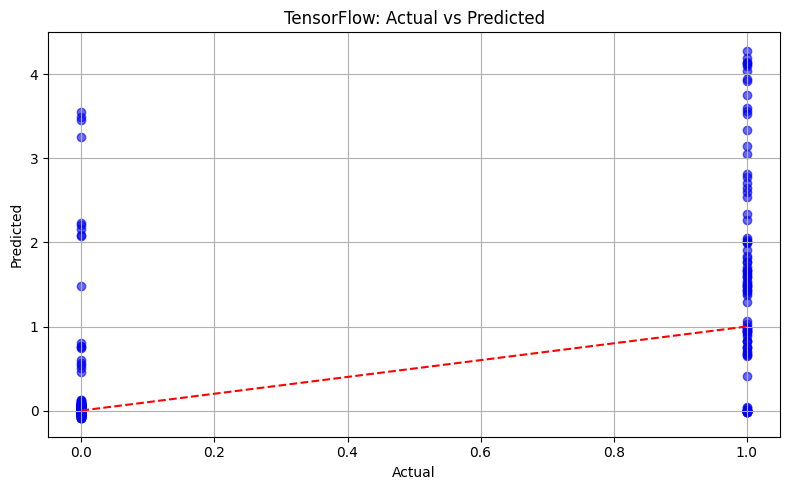

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Prediksi menggunakan model TensorFlow
y_pred_tf = model_tf.predict(X_test)

# Hitung metrik evaluasi
mse_tf = mean_squared_error(y_test, y_pred_tf)
rmse_tf = np.sqrt(mse_tf)
r2_tf = r2_score(y_test, y_pred_tf)

print(f"TensorFlow MSE  : {mse_tf:.4f}")
print(f"TensorFlow RMSE : {rmse_tf:.4f}")
print(f"TensorFlow R²   : {r2_tf:.4f}")

# Visualisasi: Prediksi vs Aktual
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred_tf, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("TensorFlow: Actual vs Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()


PyTorch MSE  : 0.0008
PyTorch RMSE : 0.0283
PyTorch R²   : 0.5340


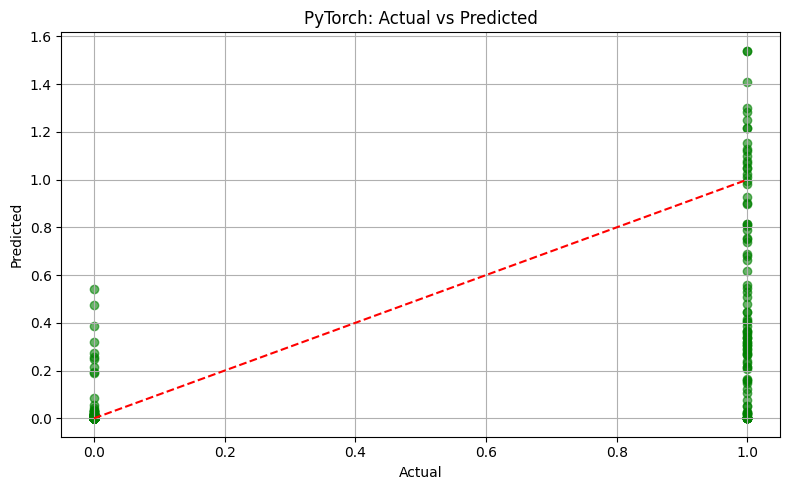

In [ ]:
# Prediksi menggunakan model PyTorch
model_pt.eval()
with torch.no_grad():
    y_pred_pt = model_pt(X_test_tensor).numpy()

# Hitung metrik evaluasi
mse_pt = mean_squared_error(y_test, y_pred_pt)
rmse_pt = np.sqrt(mse_pt)
r2_pt = r2_score(y_test, y_pred_pt)

print(f"PyTorch MSE  : {mse_pt:.4f}")
print(f"PyTorch RMSE : {rmse_pt:.4f}")
print(f"PyTorch R²   : {r2_pt:.4f}")

# Visualisasi
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred_pt, alpha=0.6, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("PyTorch: Actual vs Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()


## **Penjelasan Matematik**

> **Analisis Performa**

Untuk PyTorch:
* MSE dan RMSE sangat kecil, sehingga model membuat kesalahan prediksi yang rendah
* R^2 = 0.5340 yang artinya model menjelaskan 53.4% variasi pada data target atau cukup baik untuk regresi)
* model stabil dan tidak overfitting, dan didukung dengan teknik Dropout, BatchNorm, dan L2 regularization.

Untuk TensorFlow:

* RMSE dan MSE jauh lebih tinggi dari PyTorch
* R^2 sangat buruk, yang artinya model lebih buruk dari pada prediksi rata-rata
* Kemungkinan terjadi overfitting, kurang optimalnya learning rate, dan early stopping belum bekerja efektif.

> **Evaluasi Metrik**

* **MSE**

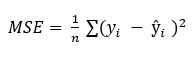

* **RMSE**


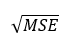

* **R^2**

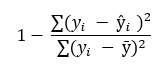


> **Kesimpulan**

Dari penggunaan dua framework (TensorFlow dan PyTorch), model PyTorch memberikan hasil terbaik baik secara akurasi prediksi maupun stabilitas model. Hal ini ditunjukkan dari nilai MSE dan RMSE yang sangat rendah serta R^2 positif, yang menandakan bahwa model memiliki kemampuan generalisasi yang lebih baik pada data yang tidak terlihat sebelumnya.
